In [1]:
# !pip install spacy
# from spacy.cli import download
# download('en_core_web_sm')

# Comparing Texts

## start

### imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import spacy
from wordcloud import WordCloud
from nltk.probability import FreqDist

### definitions

In [3]:
def batch_preprocess_texts(
    texts,
    nlp=None,
    remove_stopwords=True,
    remove_punct=True,
    use_lemmas=False,
    disable=["ner"],
    batch_size=50,
    n_process=-1,
):
    """Efficiently preprocess a collection of texts using nlp.pipe()

    Args:
        texts (collection of strings): collection of texts to process (e.g. df['text'])
        nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None; if None, it creates a default 'en_core_web_sm' pipe.
        remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
        remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
        use_lemmas (bool, optional): lemmatize tokens. Defaults to False.
        disable (list of strings, optional): named pipeline elements to disable. Defaults to ["ner"]: Used with nlp.pipe(disable=disable)
        batch_size (int, optional): Number of texts to process in a batch. Defaults to 50.
        n_process (int, optional): Number of CPU processors to use. Defaults to -1 (meaning all CPU cores).

    Returns:
        list of tokens
    """
    # from tqdm.notebook import tqdm
    from tqdm import tqdm

    if nlp is None:
        nlp = spacy.load("en_core_web_sm")

    processed_texts = []

    for doc in tqdm(nlp.pipe(texts, disable=disable, batch_size=batch_size, n_process=n_process)):
        tokens = []
        for token in doc:
            # Check if should remove stopwords and if token is stopword
            if (remove_stopwords == True) and (token.is_stop == True):
                # Continue the loop with the next token
                continue

            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_punct == True):
                continue

            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_space == True):
                continue

            
            ## Determine final form of output list of tokens/lemmas
            if use_lemmas:
                tokens.append(token.lemma_.lower())
            else:
                tokens.append(token.text.lower())

        processed_texts.append(tokens)
    return processed_texts

### data

In [4]:
fpath = 'data\Fake_Real_News_Data.csv'
df = pd.read_csv(fpath)
original_df = df.copy()
df.head()

,Unnamed: 0,title,text,label
0,0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


In [5]:
df.shape

(6335, 4)

## EDA

Clean the data. Remove any unnecessary columns and check for/remove duplicates.

In [6]:
try:
  df = df.drop(columns = 'Unnamed: 0')
  df.head()
except:
  print('Column already dropped')

In [7]:
df.duplicated().value_counts()

False    6306
True       29
dtype: int64

In [8]:
df = df.drop_duplicates()
df.shape

(6306, 3)

In [9]:
df.head()

,title,text,label
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


In [10]:
df.shape

(6306, 3)

Prepare the data. Create 3 new columns

In [11]:
clean_path = 'data/fake-real-news-data-clean.csv'
df = pd.read_csv(clean_path)
df.head()

,Unnamed: 0,title,text,label,tokenized_text,lemmatized_text,joined_lemmatized_text
0,0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"['donald', 'trump', 'endorsed', 'an', 'unabash...","['donald', 'trump', 'endorse', 'unabashedly', ...",donald trump endorse unabashedly noninterventi...
1,1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"['while', 'some', 'justice', 'department', 'in...","['justice', 'department', 'investigation', 'ad...",justice department investigation adversarial n...
2,2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"['trump', 'proudly', 'declares', ':', 'most', ...","['trump', 'proudly', 'declare', 'people', 'ins...",trump proudly declare people insult deserved a...
3,3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"['donald', 'trump', 'spent', 'a', 'day', 'in',...","['donald', 'trump', 'spend', 'day', 'january',...",donald trump spend day january 2014 hobnob pol...
4,4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"['notable', 'names', 'include', 'ray', 'washbu...","['notable', 'name', 'include', 'ray', 'washbur...",notable name include ray washburne commerce da...


In [12]:
# spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# df['tokenized_text'] = batch_preprocess_texts(df['text'], remove_stopwords=False, remove_punct=False, use_lemmas=False)
# df['lemmatized_text'] = batch_preprocess_texts(df['text'], remove_stopwords=True, remove_punct=True, use_lemmas=True)
# df['joined_lemmatized_text'] = df['lemmatized_text'].apply(lambda x: ' '.join(x))

In [13]:
df.head()

,Unnamed: 0,title,text,label,tokenized_text,lemmatized_text,joined_lemmatized_text
0,0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"['donald', 'trump', 'endorsed', 'an', 'unabash...","['donald', 'trump', 'endorse', 'unabashedly', ...",donald trump endorse unabashedly noninterventi...
1,1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"['while', 'some', 'justice', 'department', 'in...","['justice', 'department', 'investigation', 'ad...",justice department investigation adversarial n...
2,2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"['trump', 'proudly', 'declares', ':', 'most', ...","['trump', 'proudly', 'declare', 'people', 'ins...",trump proudly declare people insult deserved a...
3,3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"['donald', 'trump', 'spent', 'a', 'day', 'in',...","['donald', 'trump', 'spend', 'day', 'january',...",donald trump spend day january 2014 hobnob pol...
4,4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"['notable', 'names', 'include', 'ray', 'washbu...","['notable', 'name', 'include', 'ray', 'washbur...",notable name include ray washburne commerce da...


In [14]:
real_news = df[df['label'] == 'REAL']
fake_news = df[df['label'] == 'FAKE']

In [15]:
# real_news.head()
real_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3154 entries, 0 to 6305
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              3154 non-null   int64 
 1   title                   3154 non-null   object
 2   text                    3154 non-null   object
 3   label                   3154 non-null   object
 4   tokenized_text          3154 non-null   object
 5   lemmatized_text         3154 non-null   object
 6   joined_lemmatized_text  3154 non-null   object
dtypes: int64(1), object(6)
memory usage: 197.1+ KB


In [16]:
# fake_news.head()
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3152 entries, 2 to 6304
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              3152 non-null   int64 
 1   title                   3152 non-null   object
 2   text                    3152 non-null   object
 3   label                   3152 non-null   object
 4   tokenized_text          3152 non-null   object
 5   lemmatized_text         3152 non-null   object
 6   joined_lemmatized_text  3116 non-null   object
dtypes: int64(1), object(6)
memory usage: 197.0+ KB


Analyze class balance and document lengths

In [17]:
df['label'].value_counts()

REAL    3154
FAKE    3152
Name: label, dtype: int64

What is the average word count for real news articles? What about fake ones?

In [18]:
# this is already in the clean df
df['length'] = df['tokenized_text'].map(len)
df.head()

,Unnamed: 0,title,text,label,tokenized_text,lemmatized_text,joined_lemmatized_text,length
0,0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"['donald', 'trump', 'endorsed', 'an', 'unabash...","['donald', 'trump', 'endorse', 'unabashedly', ...",donald trump endorse unabashedly noninterventi...,14568
1,1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"['while', 'some', 'justice', 'department', 'in...","['justice', 'department', 'investigation', 'ad...",justice department investigation adversarial n...,10901
2,2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"['trump', 'proudly', 'declares', ':', 'most', ...","['trump', 'proudly', 'declare', 'people', 'ins...",trump proudly declare people insult deserved a...,3902
3,3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"['donald', 'trump', 'spent', 'a', 'day', 'in',...","['donald', 'trump', 'spend', 'day', 'january',...",donald trump spend day january 2014 hobnob pol...,19584
4,4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"['notable', 'names', 'include', 'ray', 'washbu...","['notable', 'name', 'include', 'ray', 'washbur...",notable name include ray washburne commerce da...,220


In [19]:
df.loc[df['label'] == 'REAL']['length'].mean().__int__(), df.loc[df['label'] == 'FAKE']['length'].mean().__int__()

(8697, 6667)

Compare the word frequencies:

* Create and plot the frequency distribution plots for the 20 most common words in real and fake news articles. (2 total plots)
  * Use the lemmatized text

In [20]:
lem_text_real = real_news['lemmatized_text'].explode().to_list()
lem_text_fake = fake_news['lemmatized_text'].explode().to_list() # lem_text_fake has 36 NaNs for some reason

lem_text_fake = [str(j) for j in lem_text_fake if type(j) == str]

In [21]:
dist_real = FreqDist(lem_text_real)
dist_real

FreqDist({"['kill', 'obama', 'administration', 'rule', 'dismantle', 'obamacare', 'push', 'tax', 'reform', 'early', 'list']": 57, "['verdict', '2017', 'sweeping', 'consequence', 'tech', 'startup']": 23, "['election', '232', 'photo', '43', 'number', '131', 'quote', 'candidate', 'center']": 17, "['day', '1973', 'j.', 'fred', 'buzhardt', 'lawyer', 'defend', 'president', 'richard', 'nixon', 'watergate', 'case', 'reveal', 'key', 'white', 'house', 'tape', '18']": 12, "['dems', 'want', 'white', 'house', 'b', 'demo', 'cancer', 'drug', 'shortage']": 12, "['notable', 'name', 'include', 'ray', 'washburne', 'commerce', 'dallas', 'base', 'investor', 'report', 'consideration', 'lead', 'department']": 9, "['insist', 'nailing', 'trump', 'position', 'take', 'campaign', 'say']": 8, "['campaign', 'trump', 'threaten', 'impose', 'large', 'tariff', 'job', 'united', 'states']": 7, "['easy', 'trump', 'administration', 'demolish', 'exchange']": 5, "['path', 'democrats', 'regain', 'presidency', 'run', 'ohio', 'm

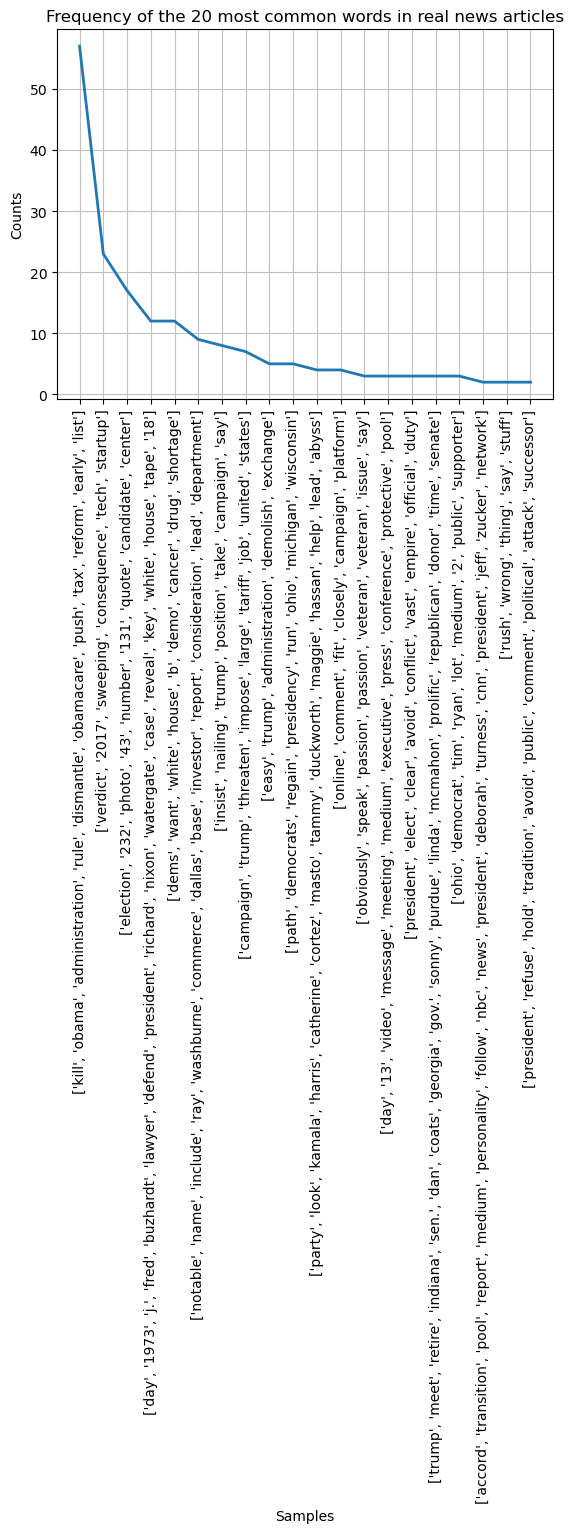

In [22]:
dist_real.plot(20, title='Frequency of the 20 most common words in real news articles');

In [23]:
dist_fake = FreqDist(lem_text_fake)
dist_fake

FreqDist({'[]': 36, "['click', 'learn', 'alexandra', 'personalized', 'essences', 'psychic', 'protection', 'click', 'information', 'psychic', 'protection', 'implant', 'removal', 'series', 'click', 'listen', 'irp', 'sa', 'dna', 'process', 'read', 'testimonials', 'click', 'read', 'experience', 'copyright', '©', '2012', 'galactic', 'connection', 'rights', 'reserve', 'excerpt', 'provide', 'clear', 'credit', 'give', 'alexandra', 'meadors', 'www.galacticconnection.com', 'appropriate', 'specific', 'direction', 'original', 'content', 'unauthorized', 'use', 'and/or', 'duplication', 'material', 'website', 'express', 'write', 'permission', 'author', 'owner', 'strictly', 'prohibit', 'thank', 'privacy', 'policy', 'subscribe', 'galacticconnection.com', 'acknowledge', 'e', 'mail', 'address', 'add', 'database', 'personal', 'information', 'work', 'affiliate', 'galacticconnection.com', 'access', 'datum', 'galacticconnection.com', 'address', 'outside', 'company', 'rent', 'sell', 'email', 'address', 'e', '

In [24]:
dist_fake.plot(20, title='Frequency of the 20 most common words in fake news articles');

AttributeError: 'Char' object has no attribute 'children'

<Figure size 640x480 with 1 Axes>

* Create word clouds for each of the article types, real and fake (2 total word clouds)
  * Use the joined lemmatized text

real news cloud

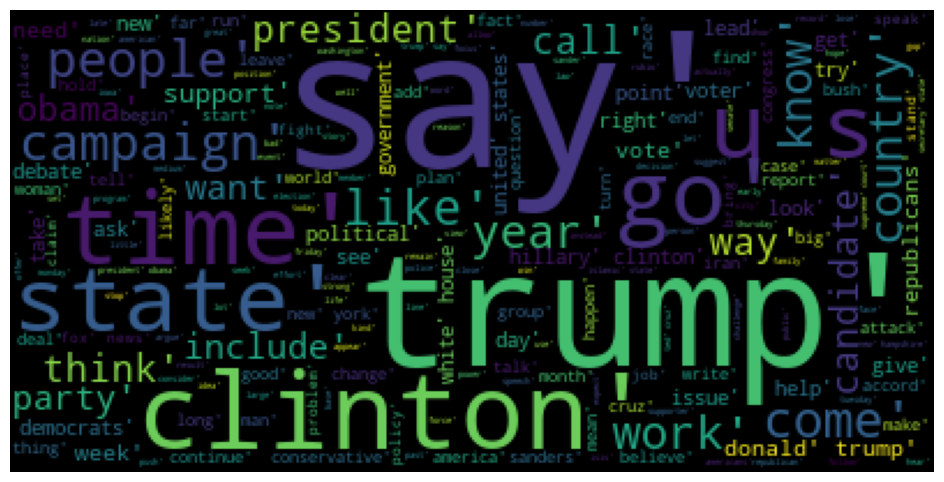

In [25]:
cloud_real = WordCloud(random_state = 123).generate(' '.join(lem_text_real))

plt.figure(figsize = (12, 6))
plt.imshow(cloud_real);
plt.axis('off');

fake news cloud

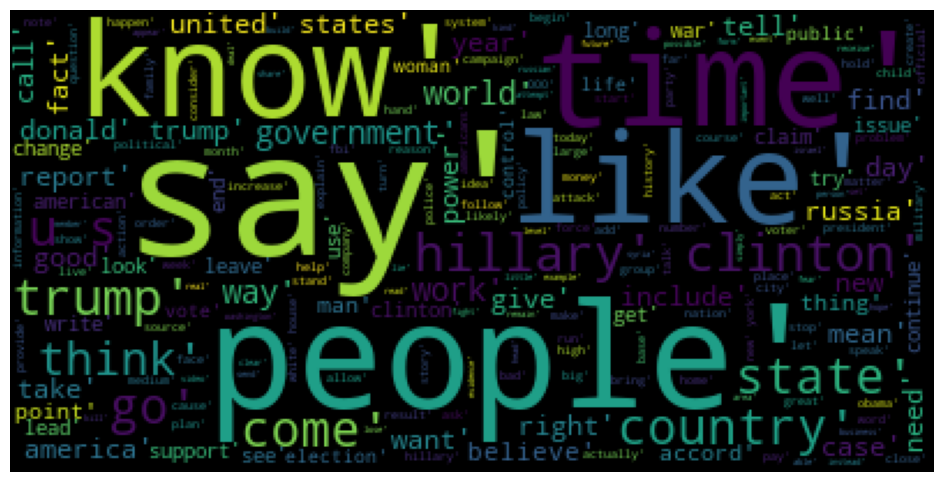

In [26]:
cloud_fake = WordCloud(random_state = 123).generate(' '.join(lem_text_fake))

plt.figure(figsize = (12, 6))
plt.imshow(cloud_fake);
plt.axis('off');

save processed df

In [27]:
import os

if not os.path.exists('data/fake-real-news-data-clean.csv'):
  df.to_csv('data/fake-real-news-data-clean.csv')